<h1 align='center'>Nova Mart Data Analysis Graphs</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h2 style="color:purple" align="center">Data Import</h2>

#### Read Data From CSV Files

In [2]:
df_campaigns = pd.read_csv("datasets/dim_campaigns.csv")
df_products = pd.read_csv("datasets/dim_products.csv")
df_stores = pd.read_csv("datasets/dim_stores.csv")
df_events = pd.read_csv("datasets/fact_events.csv")

#### Client Requests
1. Visualize the number of stores in each city. Identify the city with the most stores and explain the distribution of stores across other cities. How does the number of stores in Bengaluru compare with those in Hyderabad and Chennai?  *(Hint: Use a bar chart to visualize the number of stores by city)*

In [3]:
df_stores.head(3)

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad


##### 1. Number of Stores in Each City
Bar Chart:

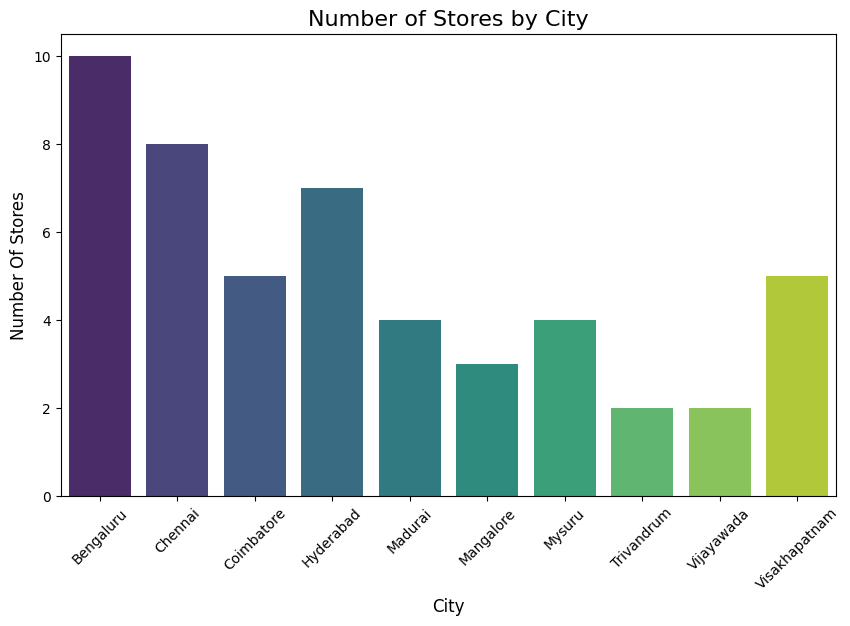

In [4]:
# Group by city and count stores
store_counts = df_stores.groupby('city').size().reset_index(name='store_count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=store_counts, x='city', y='store_count', palette='viridis')
plt.title("Number of Stores by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number Of Stores", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Insights:

1. Identify the city with the most stores.
2. Compare Bengaluru with Hyderabad and Chennai for the number of stores.

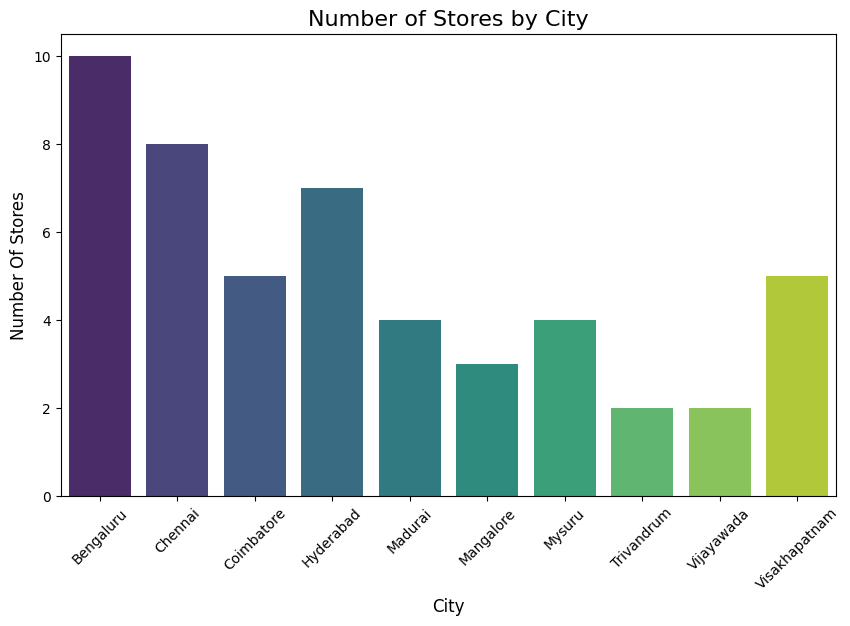

In [46]:
# # Group by city and count stores
# store_counts = df_stores.groupby('city').size().reset_index(name='store_count')

# # Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(data=store_counts, x='city', y='store_count', palette='viridis')
# plt.title("Number of Stores by City", fontsize=16)
# plt.xlabel("City", fontsize=12)
# plt.ylabel("Number Of Stores", fontsize=12)
# plt.xticks(rotation=45)

# # Save the plot to a file
# plt.savefig('stores_by_city.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()


#### Client Requests
2. Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions? *(Hint: Use a pie chart to visualize percentage contribution of each category to the overall sales)*

In [5]:
sankranti_events = pd.read_csv('dim_sankranti_events.csv')
sankranti_events.head(3)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),campaign_name,start_date,end_date,product_name,category,revenue_before_promo,revenue_after_promo
0,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Sankranti,10-01-2024,16-01-2024,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,140230.0,300070
1,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Sankranti,10-01-2024,16-01-2024,Atliq_Home_Essential_8_Product_Combo,Combo1,366000.0,680000
2,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Sankranti,10-01-2024,16-01-2024,Atliq_Double_Bedsheet_set,Home Care,26180.0,52360


##### 2. Total Quantity Sold After Promotion by Category
Pie Chart:

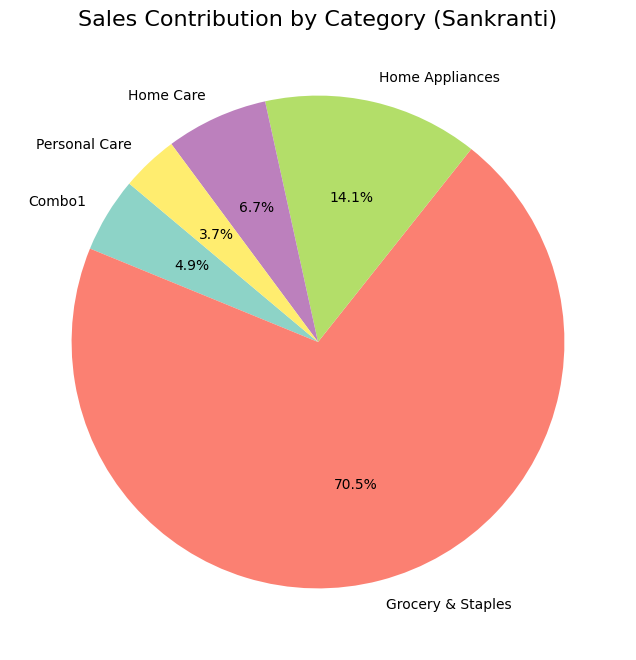

In [6]:
# Aggregate sales by category
category_sales = sankranti_events.groupby('category')['quantity_sold(after_promo)'].sum()


# Plot
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Sales Contribution by Category (Sankranti)", fontsize=16)
plt.ylabel('')
plt.show()

#### Insights:

1. Percentage contribution of each category to overall sales.
2. Highlight the dominance of Grocery & Staples and opportunities for smaller categories.

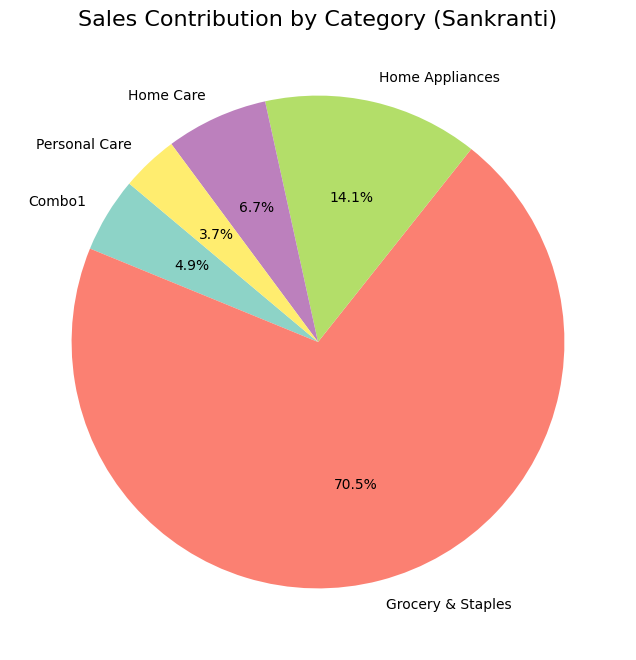

In [47]:
# # Aggregate sales by category
# category_sales = sankranti_events.groupby('category')['quantity_sold(after_promo)'].sum()

# # Plot
# plt.figure(figsize=(8, 8))
# category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
# plt.title("Sales Contribution by Category (Sankranti)", fontsize=16)
# plt.ylabel('')

# # Save the plot to a file
# plt.savefig('sales_contribution_by_category.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()


#### Client Requests
3. Examine the correlation between base price (after the promotion) and sales quantities (after the promotion). What insights can be drawn regarding the
 relationship between base price and sales quantities after the promotion? *(Hint: Use heatmap to get the correlation)*

In [10]:
# Remove duplicates based on specified columns
df_events_1 = df_events.drop_duplicates(subset=['store_id', 'campaign_id', 'product_code'])
# Fill missing values in quantity_sold(before_promo) with the median
median_quantity_sold = df_events_1['quantity_sold(before_promo)'].median()
df_events_1['quantity_sold(before_promo)'].fillna(median_quantity_sold, inplace=True)

##### 3. Correlation Between Base Price and Sales Quantities
Heatmap:

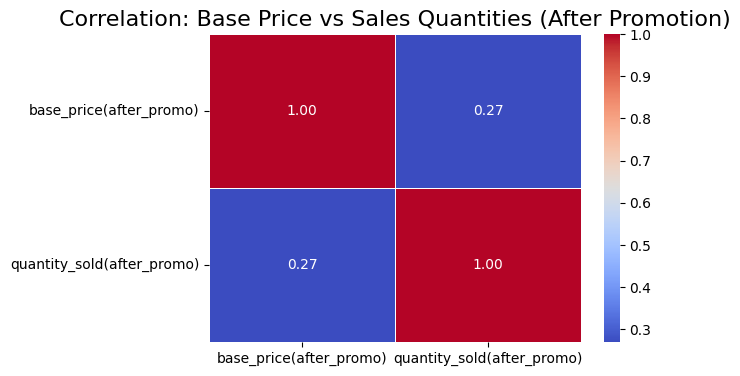

In [14]:
# Select relevant columns from the complete events dataset
correlation_data = df_events_1[['base_price(after_promo)', 'quantity_sold(after_promo)']]
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation: Base Price vs Sales Quantities (After Promotion)', fontsize=16)
plt.show()

#### Insights

1. Global Trends Across All Campaigns:
* This analysis ensures that any trends in the relationship between price and sales volume are not confined to a single campaign. Different campaigns might exhibit varying dynamics based on their promotional strategies.

2. Insights Across Categories:
* If the correlation across all campaigns remains consistently negative, it strongly supports the argument that price reductions during promotions  generally boost sales volumes.
* If the correlation varies significantly, it could indicate specific product categories or campaigns where price plays a lesser role in driving sales.

3. Comparison with Sankranti Events:
* An additional layer of analysis could involve comparing the correlation for Sankranti events with the overall correlation. This helps isolate any campaign-specific behaviors or strategies.

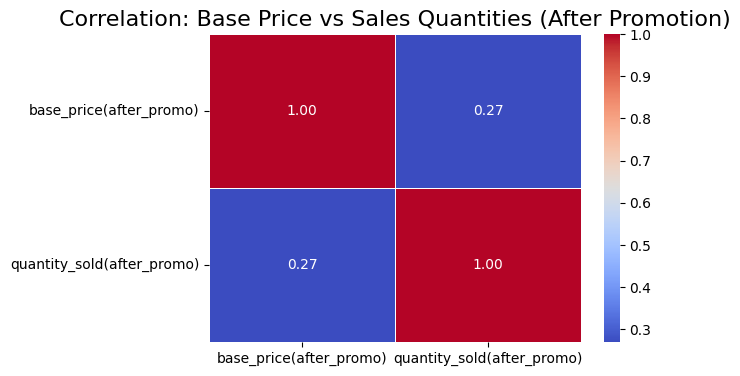

In [48]:
# # Select relevant columns from the complete events dataset
# correlation_data = df_events_1[['base_price(after_promo)', 'quantity_sold(after_promo)']]

# # Calculate the correlation matrix
# correlation_matrix = correlation_data.corr()

# # Plot the heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation: Base Price vs Sales Quantities (After Promotion)', fontsize=16)

# # Save the plot to a file
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()


#### Client Requests
4.  Analyze the distribution of quantity sold before the promotion for each product category (Grocery & Staples, Home Care, Personal Care, Home Appliances, etc.). What patterns or trends do you observe across these categories, and how could these insights inform future promotional strategies? *(Hint: Use individual histograms to visualize the distribution)*

In [20]:
# Merge fact_events with dim_products to get product categories
events_with_categories = pd.merge(df_events_1, df_products, on='product_code', how='left')

# Get unique categories
categories = events_with_categories['category'].unique()
categories

array(['Grocery & Staples', 'Home Care', 'Combo1', 'Home Appliances',
       'Personal Care'], dtype=object)

##### 4. Distribution of Quantity Sold Before Promotion
Histograms:

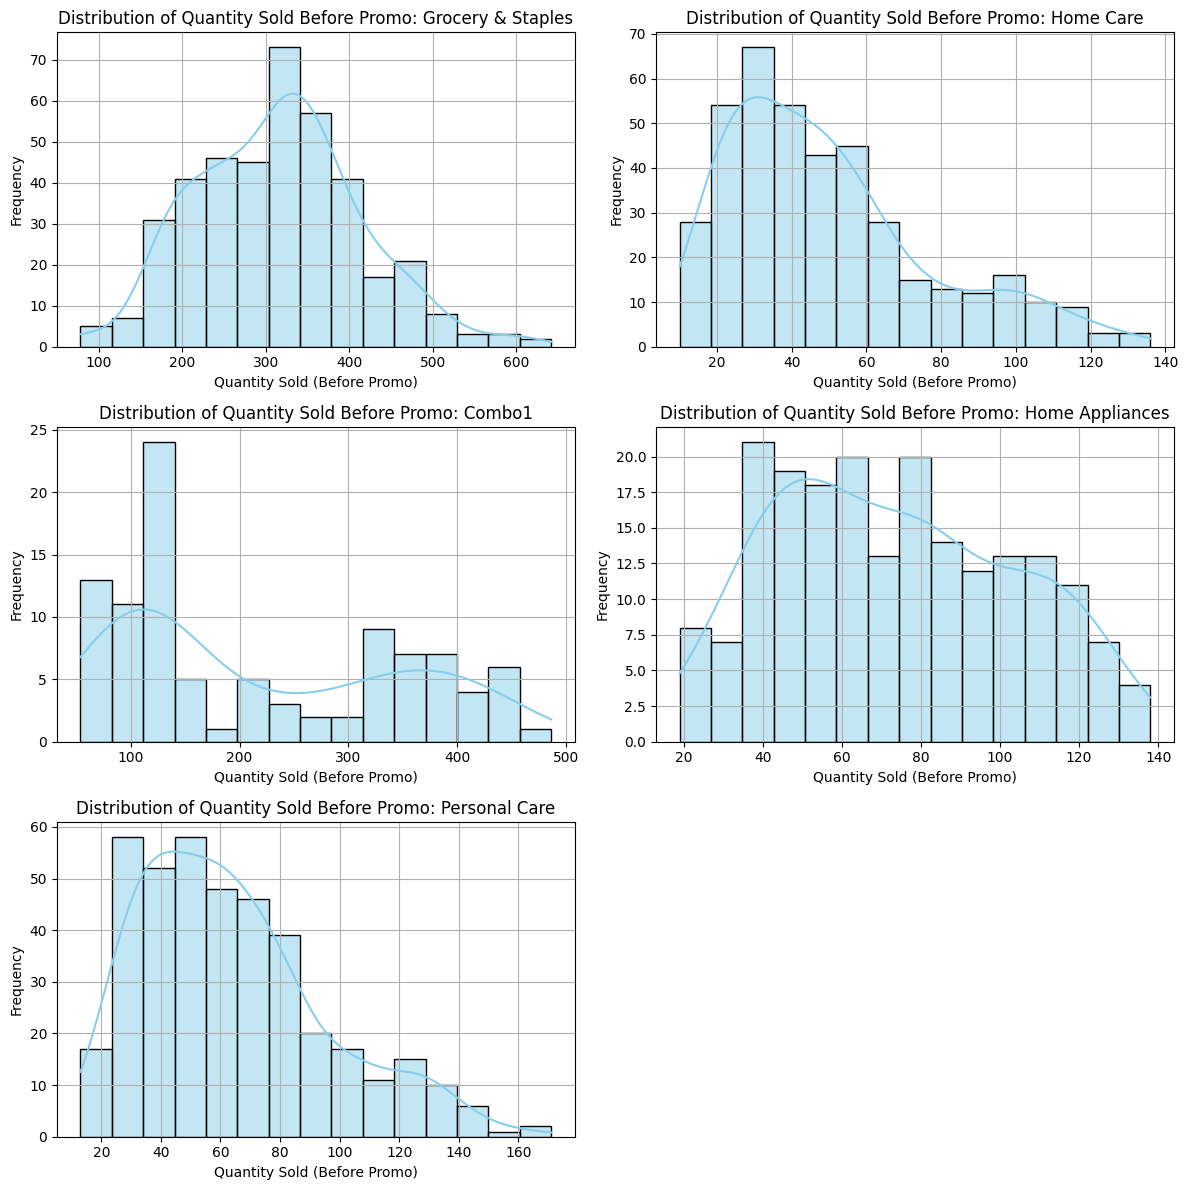

In [27]:
# Calculate the number of rows and columns for subplots
num_categories = len(categories)
num_cols = 2  # Set the number of columns
num_rows = math.ceil(num_categories / num_cols)  # Calculate rows needed

# Set up the plotting area
plt.figure(figsize=(12, num_rows * 4))

for i, category in enumerate(categories, 1):
    plt.subplot(num_rows, num_cols, i)
    categorical_data = events_with_categories[events_with_categories['category'] == category].copy()
    sns.histplot(categorical_data['quantity_sold(before_promo)'], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of Quantity Sold Before Promo: {category}', fontsize=12)
    plt.xlabel('Quantity Sold (Before Promo)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights:
1. Grocery & Staples:
Likely to have the widest distribution with the highest quantities sold, as these are essential items purchased frequently.
A focus on offering regular promotions might help maintain or increase customer loyalty.

2. Home Care:
Sales may exhibit a narrower distribution, indicating more consistent but lower sales volumes compared to essentials.
Seasonal promotions or bundling strategies could enhance performance in this category.

3. Personal Care:
Often characterized by niche or moderate sales. Targeted marketing campaigns and cross-promotions (e.g., “Buy 1 Get 1 Free”) may boost sales in this category.

4. Home Appliances:
Expected to have a sparse distribution, as these items are less frequently purchased but higher in value.
Focused discounts or festival campaigns might be more effective in this category.

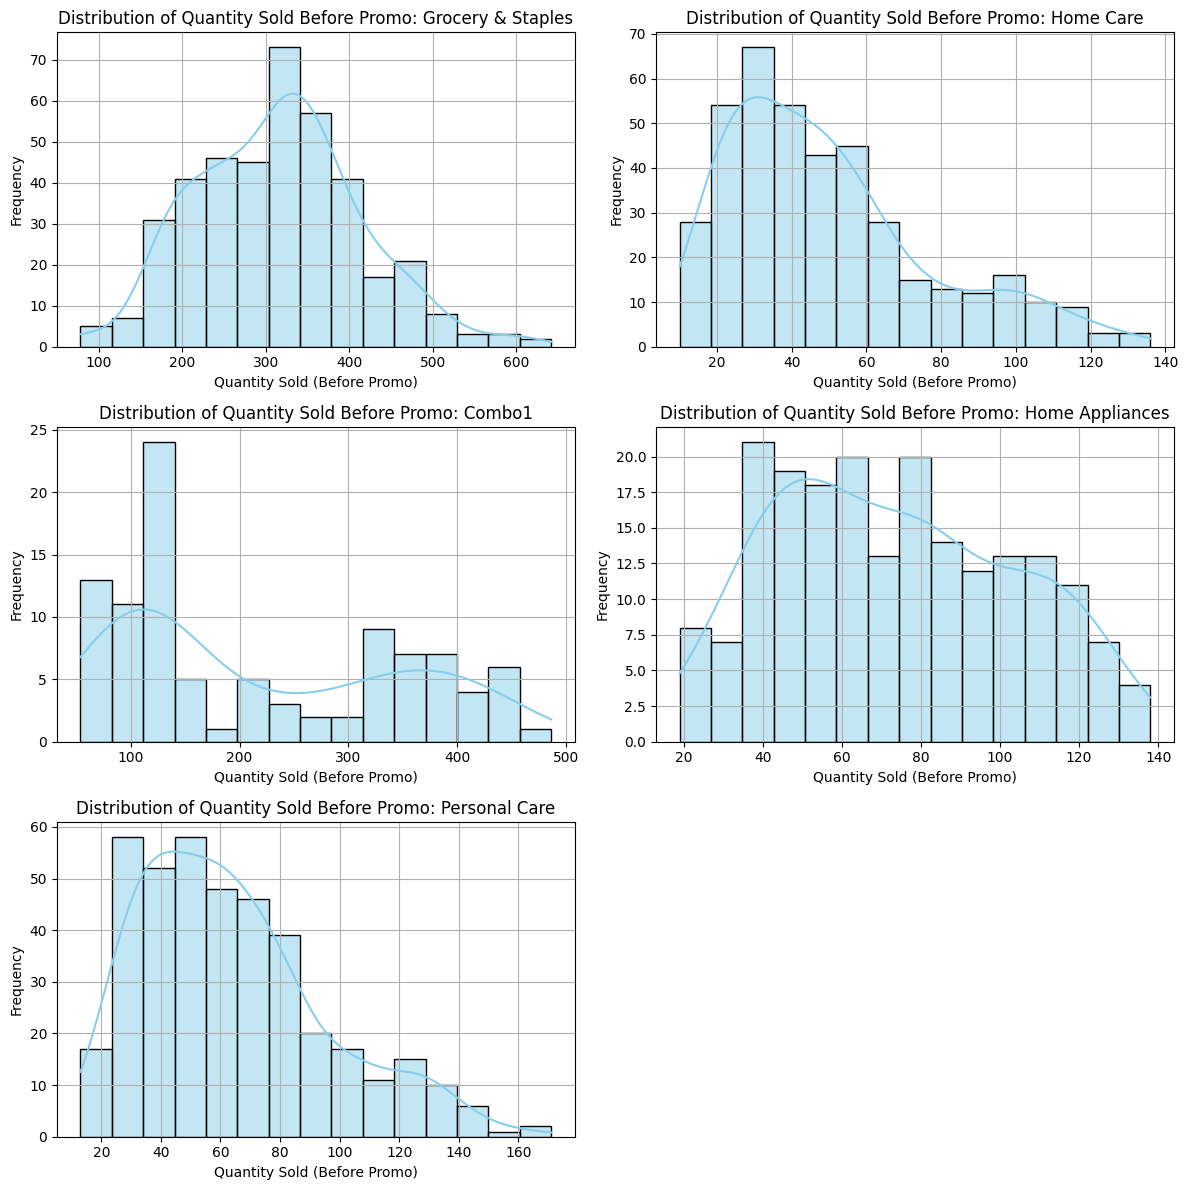

In [49]:
# import math
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate the number of rows and columns for subplots
# num_categories = len(categories)
# num_cols = 2  # Set the number of columns
# num_rows = math.ceil(num_categories / num_cols)  # Calculate rows needed

# # Set up the plotting area
# plt.figure(figsize=(12, num_rows * 4))

# for i, category in enumerate(categories, 1):
#     plt.subplot(num_rows, num_cols, i)
#     categorical_data = events_with_categories[events_with_categories['category'] == category].copy()
#     sns.histplot(categorical_data['quantity_sold(before_promo)'], bins=15, kde=True, color='skyblue')
#     plt.title(f'Distribution of Quantity Sold Before Promo: {category}', fontsize=12)
#     plt.xlabel('Quantity Sold (Before Promo)', fontsize=10)
#     plt.ylabel('Frequency', fontsize=10)
#     plt.grid(True)

# # Adjust layout to avoid overlapping elements
# plt.tight_layout()

# # Save all the graphs in a single image file
# plt.savefig('multiple_graphs.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()


#### Client Requests
5. Analyze the incremental sold units percentage (ISU%) across various cities. Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities? *(Hint: Use a line chart to visualize the ISU% comparison across cities)*

In [30]:
# Merge fact_events with dim_stores to get city information
events_with_cities = pd.merge(df_events_1, df_stores, on='store_id', how='left')

# Group by city and calculate total quantities sold before and after the promotion
city_sales = events_with_cities.groupby('city').agg(
    total_quantity_sold_before_promo=('quantity_sold(before_promo)', 'sum'),
    total_quantity_sold_after_promo=('quantity_sold(after_promo)', 'sum')
).reset_index()
# # Group by city and calculate total quantities sold before and after the promotion
# city_sales = events_with_cities.groupby('city').agg(
#     total_quantity_sold_before_promo=pd.NamedAgg(column='quantity_sold(before_promo)', aggfunc='sum'),
#     total_quantity_sold_after_promo=pd.NamedAgg(column='quantity_sold(after_promo)', aggfunc='sum')
# ).reset_index()

# Calculate Incremental Sold Units Percentage (ISU%) for each city
city_sales['ISU%'] = ((city_sales['total_quantity_sold_after_promo'] - city_sales['total_quantity_sold_before_promo']) /
                      city_sales['total_quantity_sold_before_promo']) * 100

# Sort by ISU% for clear visualization
city_sales = city_sales.sort_values(by='ISU%', ascending=False)

##### 5. Incremental Sold Units Percentage Across Cities
Line Chart:

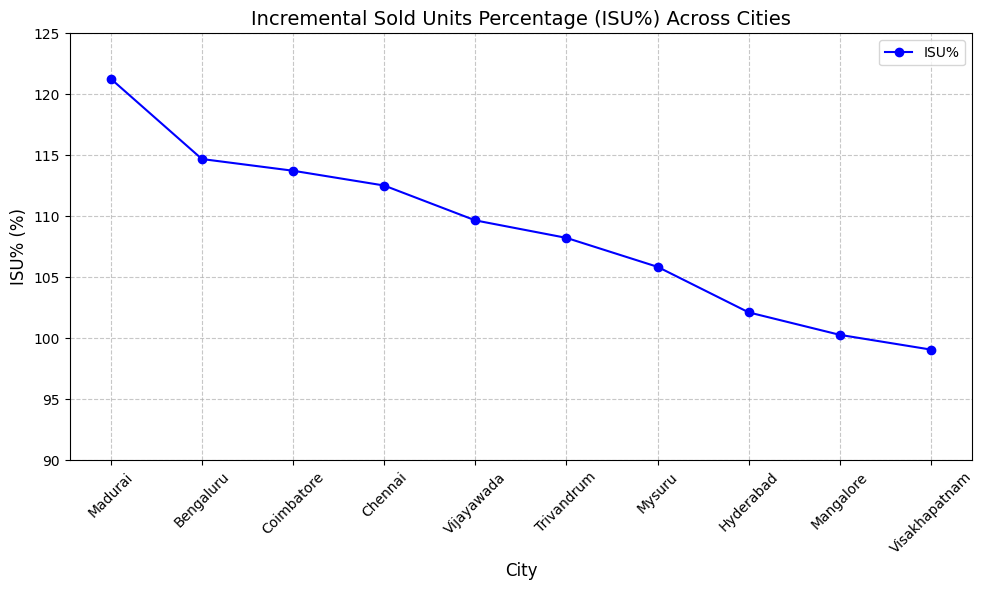

The city with the highest ISU% is Madurai with an ISU% of 121.28%.
The city with the smallest ISU% is Visakhapatnam with an ISU% of 99.07%.


In [32]:
# Identify the city with the highest and smallest ISU%
highest_isu_city = city_sales.iloc[0]
smallest_isu_city = city_sales.iloc[-1]

# Plot ISU% as a line chart
plt.figure(figsize=(10, 6))
plt.plot(city_sales['city'], city_sales['ISU%'], marker='o', color='blue', label='ISU%')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line for no change
plt.ylim(90, 125)  # Scale y-axis from 90 to 125
plt.title('Incremental Sold Units Percentage (ISU%) Across Cities', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('ISU% (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Print insights
print(f"The city with the highest ISU% is {highest_isu_city['city']} with an ISU% of {highest_isu_city['ISU%']:.2f}%.")
print(f"The city with the smallest ISU% is {smallest_isu_city['city']} with an ISU% of {smallest_isu_city['ISU%']:.2f}%.")

#### Insights to Look For:
1. Cities with Positive ISU%: Identify cities where promotions were effective in boosting sales. For example, a high ISU% suggests strong responsiveness to promotions.
2. Cities with Small or Negative ISU%: Highlight areas where promotions had little impact or even decreased sales.
3. Trends Across Cities: Observe whether ISU% is higher in larger cities, specific regions, or certain store types, indicating varying promotional effectiveness.

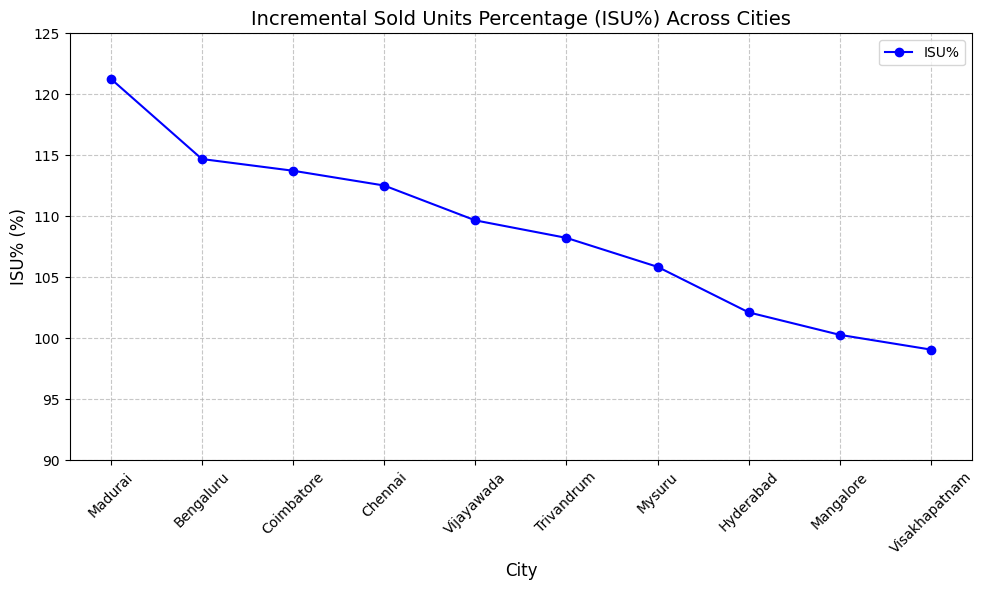

The city with the highest ISU% is Madurai with an ISU% of 121.28%.
The city with the smallest ISU% is Visakhapatnam with an ISU% of 99.07%.


In [50]:
# # Identify the city with the highest and smallest ISU%
# highest_isu_city = city_sales.iloc[0]
# smallest_isu_city = city_sales.iloc[-1]

# # Plot ISU% as a line chart
# plt.figure(figsize=(10, 6))
# plt.plot(city_sales['city'], city_sales['ISU%'], marker='o', color='blue', label='ISU%')
# plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line for no change
# plt.ylim(90, 125)  # Scale y-axis from 90 to 125
# plt.title('Incremental Sold Units Percentage (ISU%) Across Cities', fontsize=14)
# plt.xlabel('City', fontsize=12)
# plt.ylabel('ISU% (%)', fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend()
# plt.tight_layout()

# # Save the plot to a file
# plt.savefig('isu_percentage_line_chart.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()

# # Print insights
# print(f"The city with the highest ISU% is {highest_isu_city['city']} with an ISU% of {highest_isu_city['ISU%']:.2f}%.")
# print(f"The city with the smallest ISU% is {smallest_isu_city['city']} with an ISU% of {smallest_isu_city['ISU%']:.2f}%.")


#### Client Requests
6. Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city?  *(Hint: Use a scatter plot to analyze the relationship)*

In [41]:
# Step 1: Filter data for Hyderabad
hyderabad_store_ids = df_stores[df_stores['city'] == 'Hyderabad']['store_id']
hyderabad_events = df_events_1[df_events['store_id'].isin(hyderabad_store_ids)]

# Step 2: Calculate Incremental Metrics
hyderabad_events['IR%'] = (
    (hyderabad_events['base_price(after_promo)'] * hyderabad_events['quantity_sold(after_promo)'] -
     hyderabad_events['base_price(before_promo)'] * hyderabad_events['quantity_sold(before_promo)']) /
    (hyderabad_events['base_price(before_promo)'] * hyderabad_events['quantity_sold(before_promo)']) * 100
)

hyderabad_events['ISU%'] = (
    (hyderabad_events['quantity_sold(after_promo)'] - hyderabad_events['quantity_sold(before_promo)']) /
    hyderabad_events['quantity_sold(before_promo)'] * 100
)

# Step 3: Group by Promotion Type
promo_summary = hyderabad_events.groupby('promo_type').agg(
    {'IR%': 'mean', 'ISU%': 'mean'}
).reset_index()


##### 6. Relationship Between Incremental Revenue and Incremental Sold Units
Scatter Plot:

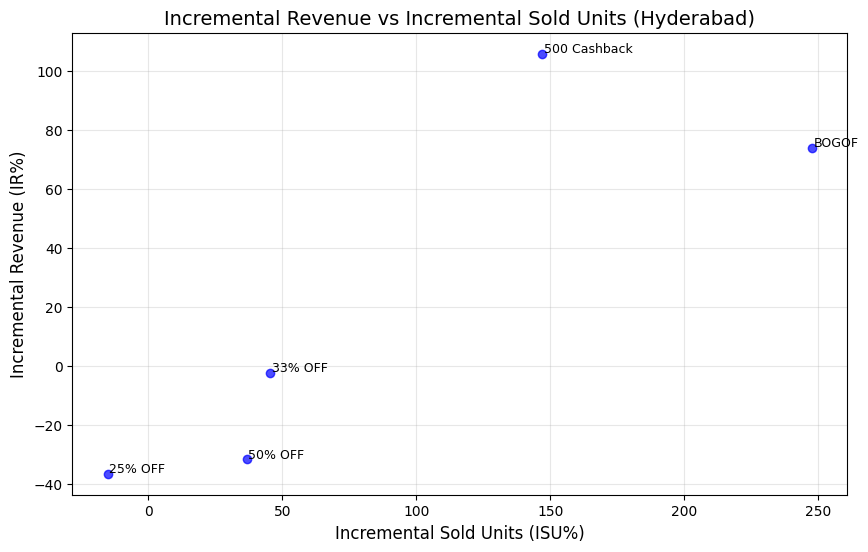

The promotion type with the highest Incremental Sold Units (ISU%) is BOGOF.
The promotion type with the highest Incremental Revenue (IR%) is 500 Cashback.


In [42]:
# Step 4: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(promo_summary['ISU%'], promo_summary['IR%'], color='blue', alpha=0.7)

# Annotate points
for i, promo in enumerate(promo_summary['promo_type']):
    plt.text(promo_summary['ISU%'][i] + 0.5, promo_summary['IR%'][i] + 0.5, promo, fontsize=9)

# Plot settings
plt.title('Incremental Revenue vs Incremental Sold Units (Hyderabad)', fontsize=14)
plt.xlabel('Incremental Sold Units (ISU%)', fontsize=12)
plt.ylabel('Incremental Revenue (IR%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Step 5: Insights
max_isu_promo = promo_summary.loc[promo_summary['ISU%'].idxmax()]
max_ir_promo = promo_summary.loc[promo_summary['IR%'].idxmax()]

print(f"The promotion type with the highest Incremental Sold Units (ISU%) is {max_isu_promo['promo_type']}.")
print(f"The promotion type with the highest Incremental Revenue (IR%) is {max_ir_promo['promo_type']}.")

#### Insights:
1. Highest ISU% Promotion: Indicates which promotion boosted unit sales the most.
2. Highest IR% Promotion: Indicates which promotion drove the most revenue growth.
3. Balance Between ISU% and IR%:
    * High ISU% but low IR% suggests the promotion drove volume but at the cost of heavy discounts.
    * High IR% and moderate ISU% suggest the promotion was effective in generating revenue without heavy discounting.

#### Client Requests
7.  Analyze the revenue before and after promotions across different product categories in Bengaluru. What trends can be identified in the performance of each category, and how did promotions impact overall revenue in the city? *(Hint: Use a vertical bar chart to compare the revenue before and after promotions)*

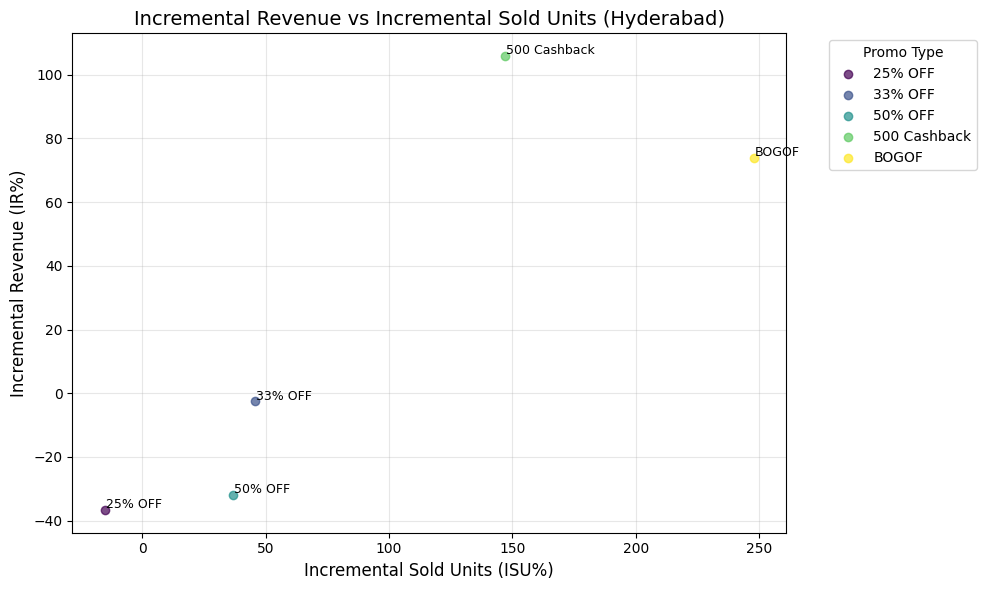

The promotion type with the highest Incremental Sold Units (ISU%) is BOGOF.
The promotion type with the highest Incremental Revenue (IR%) is 500 Cashback.


In [51]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np

# # Step 4: Scatter Plot
# plt.figure(figsize=(10, 6))

# # Generate colors based on the promo type
# colors = cm.viridis(np.linspace(0, 1, len(promo_summary)))  # Using 'viridis' colormap
# for i, promo in enumerate(promo_summary['promo_type']):
#     plt.scatter(promo_summary['ISU%'][i], promo_summary['IR%'][i], color=colors[i], alpha=0.7, label=promo)

# # Annotate points
# for i, promo in enumerate(promo_summary['promo_type']):
#     plt.text(promo_summary['ISU%'][i] + 0.5, promo_summary['IR%'][i] + 0.5, promo, fontsize=9)

# # Plot settings
# plt.title('Incremental Revenue vs Incremental Sold Units (Hyderabad)', fontsize=14)
# plt.xlabel('Incremental Sold Units (ISU%)', fontsize=12)
# plt.ylabel('Incremental Revenue (IR%)', fontsize=12)
# plt.grid(alpha=0.3)
# plt.legend(title="Promo Type", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Save the plot to a file
# plt.savefig('scatter_plot_ir_vs_isu.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# # Show the plot
# plt.show()

# # Step 5: Insights
# max_isu_promo = promo_summary.loc[promo_summary['ISU%'].idxmax()]
# max_ir_promo = promo_summary.loc[promo_summary['IR%'].idxmax()]

# print(f"The promotion type with the highest Incremental Sold Units (ISU%) is {max_isu_promo['promo_type']}.")
# print(f"The promotion type with the highest Incremental Revenue (IR%) is {max_ir_promo['promo_type']}.")


##### 7. Revenue Before and After Promotion by Category in Bengaluru
Vertical Bar Chart:

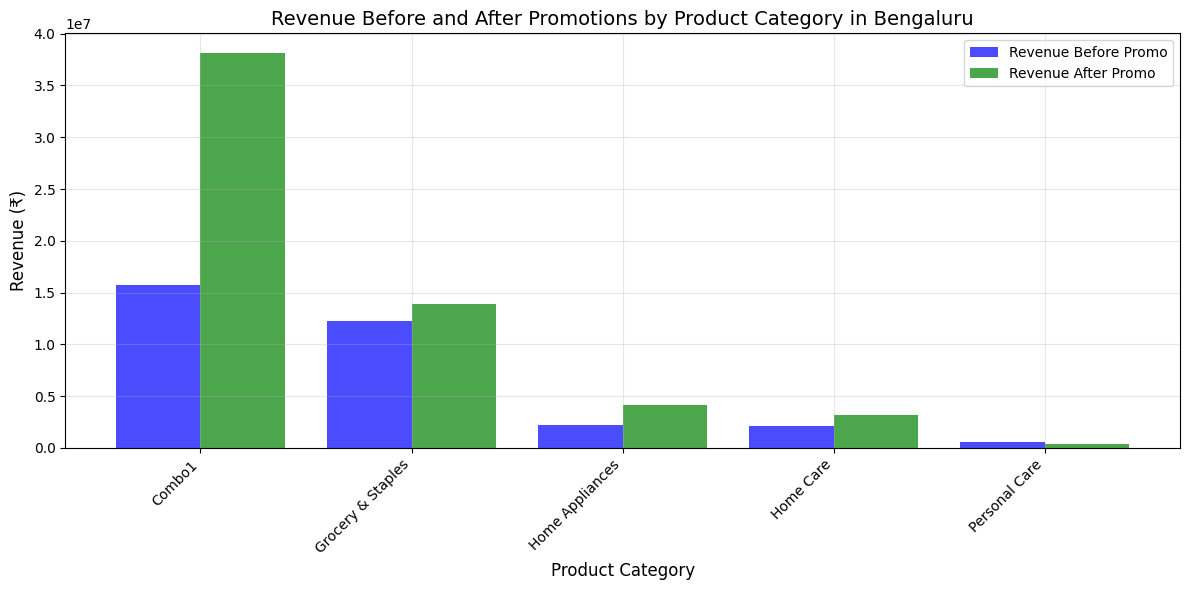

Revenue Changes by Category:

            category  revenue_before_promo  revenue_after_promo  \
0             Combo1            15777000.0             38125000   
1  Grocery & Staples            12262460.0             13861259   
2    Home Appliances             2188810.0              4122680   
3          Home Care             2104460.0              3180020   
4      Personal Care              576321.0               389629   

   change_in_revenue  
0         22348000.0  
1          1598799.0  
2          1933870.0  
3          1075560.0  
4          -186692.0  


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter data for Bengaluru
bengaluru_store_ids = df_stores[df_stores['city'] == 'Bengaluru']['store_id']
bengaluru_events = df_events_1[df_events_1['store_id'].isin(bengaluru_store_ids)]

# Step 2: Join with product information to get categories
bengaluru_events = bengaluru_events.merge(df_products, on='product_code', how='left')

# Step 3: Calculate revenue before and after promotions
bengaluru_revenue = bengaluru_events.groupby('category').agg(
    revenue_before_promo=pd.NamedAgg(
        column='base_price(before_promo)', 
        aggfunc=lambda x: (x * bengaluru_events.loc[x.index, 'quantity_sold(before_promo)']).sum()
    ),
    revenue_after_promo=pd.NamedAgg(
        column='base_price(after_promo)', 
        aggfunc=lambda x: (x * bengaluru_events.loc[x.index, 'quantity_sold(after_promo)']).sum()
    )
).reset_index()

# Step 4: Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = range(len(bengaluru_revenue['category']))

# Plot bars for revenue before and after promotions
plt.bar(x, bengaluru_revenue['revenue_before_promo'], width=bar_width, label='Revenue Before Promo', color='blue', alpha=0.7)
plt.bar([p + bar_width for p in x], bengaluru_revenue['revenue_after_promo'], width=bar_width, label='Revenue After Promo', color='green', alpha=0.7)

# Plot settings
plt.title('Revenue Before and After Promotions by Product Category in Bengaluru', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue (₹)', fontsize=12)
plt.xticks([p + bar_width/2 for p in x], bengaluru_revenue['category'], rotation=45, ha='right')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Insights
bengaluru_revenue['change_in_revenue'] = bengaluru_revenue['revenue_after_promo'] - bengaluru_revenue['revenue_before_promo']
print("Revenue Changes by Category:")
print()
print(bengaluru_revenue[['category', 'revenue_before_promo', 'revenue_after_promo', 'change_in_revenue']])


#### Insights to Draw:

1. Category-Specific Trends:
    * Identify categories with significant revenue growth after promotions (e.g., "Home Appliances" might show higher growth due to discount-driven sales).

2. Impact of Promotions:
    * If revenue after promotions is consistently higher, promotions effectively boosted sales.
    * If revenue is lower, discounts might have been too aggressive, reducing profitability.
3. Overall Revenue Change:
    * Sum up revenue changes across categories to evaluate the overall impact of promotions in Bengaluru.

In [54]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Filter data for Bengaluru
# bengaluru_store_ids = df_stores[df_stores['city'] == 'Bengaluru']['store_id']
# bengaluru_events = df_events_1[df_events_1['store_id'].isin(bengaluru_store_ids)]

# # Step 2: Join with product information to get categories
# bengaluru_events = bengaluru_events.merge(df_products, on='product_code', how='left')

# # Step 3: Calculate revenue before and after promotions
# bengaluru_revenue = bengaluru_events.groupby('category').agg(
#     revenue_before_promo=pd.NamedAgg(
#         column='base_price(before_promo)', 
#         aggfunc=lambda x: (x * bengaluru_events.loc[x.index, 'quantity_sold(before_promo)']).sum()
#     ),
#     revenue_after_promo=pd.NamedAgg(
#         column='base_price(after_promo)', 
#         aggfunc=lambda x: (x * bengaluru_events.loc[x.index, 'quantity_sold(after_promo)']).sum()
#     )
# ).reset_index()

# # Step 4: Bar Chart
# fig, ax = plt.subplots(figsize=(12, 6))
# bar_width = 0.4
# x = range(len(bengaluru_revenue['category']))

# # Plot bars for revenue before and after promotions
# plt.bar(x, bengaluru_revenue['revenue_before_promo'], width=bar_width, label='Revenue Before Promo', color='blue', alpha=0.7)
# plt.bar([p + bar_width for p in x], bengaluru_revenue['revenue_after_promo'], width=bar_width, label='Revenue After Promo', color='green', alpha=0.7)

# # Plot settings
# plt.title('Revenue Before and After Promotions by Product Category in Bengaluru', fontsize=14)
# plt.xlabel('Product Category', fontsize=12)
# plt.ylabel('Revenue (₹)', fontsize=12)
# plt.xticks([p + bar_width/2 for p in x], bengaluru_revenue['category'], rotation=45, ha='right')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()

# # Save the plot before showing it
# plt.savefig('bengaluru_revenue_comparison.png', dpi=300, bbox_inches='tight')

# # Show the plot
# plt.show()

# # Step 5: Insights
# bengaluru_revenue['change_in_revenue'] = bengaluru_revenue['revenue_after_promo'] - bengaluru_revenue['revenue_before_promo']
# print("Revenue Changes by Category:")
# print()
# print(bengaluru_revenue[['category', 'revenue_before_promo', 'revenue_after_promo', 'change_in_revenue']])
